# Lab deep learning - some details

## Notes 

- test dataset from original data doesn't have any labels
- test part is used for competition - that's why it doesn't have labels
- train part - have labels in their names 

Examples
```
cat.2314.jpg
dog.2134.jpg
```

## 0c) and 0d)

- move data into new folder structure
- test, train and val are folders 
- pick data from original train and move it into the new folders

```md
├── experiment_small_data
│ ├── test
│ ├── train
│ └── val

```

- data that should be moved from original train to the different folders 
- there shouldn't copies of images 

## 0e) 

1. få en lista av filnamn
2. slumpa listan
3. list comprehension -> läsa in bilderna - resultatet är en lista av numpy arrays
4. från slumpade listan plocka ut labels i form av 0 och 1 i en array -> y_train

In [22]:
from pathlib import Path
import matplotlib.pyplot as plt 

datapath = Path().absolute().parent / "data"
images = [plt.imread(path) for path in datapath.glob("*.jpg")]

len(images)


10

In [23]:
images[0].shape, images[1].shape

((374, 500, 3), (320, 250, 3))

In [24]:
paths = [str(path) for path in datapath.glob("*.jpg")]
paths

['/Users/aigineer/Documents/github/Artificial_Intelligence_HA24/data/cat.9922.jpg',
 '/Users/aigineer/Documents/github/Artificial_Intelligence_HA24/data/dog.10143.jpg',
 '/Users/aigineer/Documents/github/Artificial_Intelligence_HA24/data/cat.9921.jpg',
 '/Users/aigineer/Documents/github/Artificial_Intelligence_HA24/data/cat.9920.jpg',
 '/Users/aigineer/Documents/github/Artificial_Intelligence_HA24/data/dog.10144.jpg',
 '/Users/aigineer/Documents/github/Artificial_Intelligence_HA24/data/cat.9919.jpg',
 '/Users/aigineer/Documents/github/Artificial_Intelligence_HA24/data/dog.10135.jpg',
 '/Users/aigineer/Documents/github/Artificial_Intelligence_HA24/data/dog.10136.jpg',
 '/Users/aigineer/Documents/github/Artificial_Intelligence_HA24/data/dog.10137.jpg',
 '/Users/aigineer/Documents/github/Artificial_Intelligence_HA24/data/dog.10138.jpg']

In [25]:
"dog" in paths[0]

False

In [28]:
import numpy as np 
y = np.array([int("dog" in path) for path in paths])
y

array([0, 1, 0, 0, 1, 0, 1, 1, 1, 1])

## 1a) pick out shapes

In [32]:
heights = [image.shape[0] for image in images]
widths = [image.shape[1] for image in images]
heights

[374, 320, 333, 375, 228, 420, 371, 270, 499, 500]

In [33]:
widths

[500, 250, 385, 499, 144, 499, 499, 299, 375, 378]

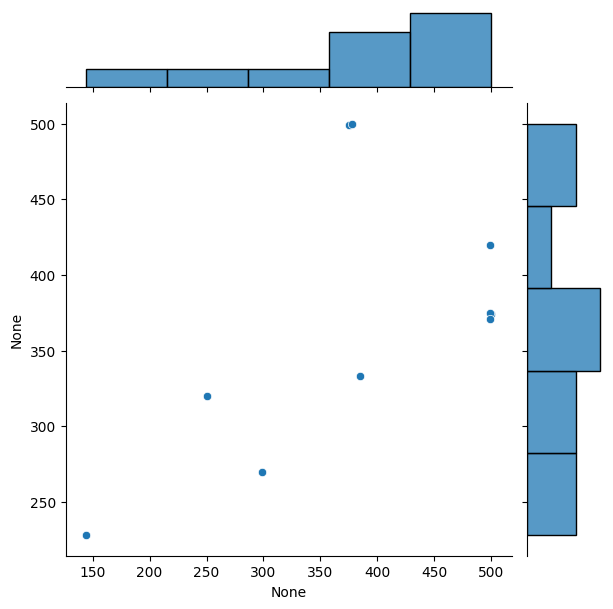

In [34]:
import seaborn as sns 

sns.jointplot(x=widths, y=heights)

## pick size to use 

large size
- a lot of details 
- risk for overfitting
- computational costly

small size
- cheaper computation
- less details 
- less details make less overfitting in general, but don't have too little details

something consider
- don't go outside of the range of your distribution
- ex (150, 150), (180, 200), (120, 120)
- size by itself is a hyperparameter

In [36]:
# resizing something like this 
# image_resize = np.array([cv2.resize(image, width, height) for image in images])